In [1]:
import torch

if torch.cuda.is_available():
    print("GPU is available")
    print(f"GPU device name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available")

GPU is available
GPU device name: Tesla T4


In [2]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [3]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [4]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [6]:
import sys

!echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

# 나눔 폰트를 설치합니다.
!sudo apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# 나눔바른고딕 폰트로 설정합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 표시 오류 수정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: DbDriver "passwords" warning: could not open /var/cache/debconf/passwords.dat: Permission denied
debconf: DbDriver "config": could not write /var/cache/debconf/config.dat-new: Permission denied


In [7]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [8]:
# Tensorflow
import tensorflow as tf

2024-10-21 05:00:17.369481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 05:00:17.582425: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 05:00:17.645099: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 05:00:18.077459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-21 05:00:19.925801: W tensorflow/compiler/tf2

In [9]:
# Tensorflow Sequential model
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Embedding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model, to_categorical

In [10]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [11]:
# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

In [12]:
import gc

def gc_collect():
    gc.collect()

# 데이터 로드

### 1. gcsfuse 마운트

https://cloud.google.com/storage/docs/gcsfuse-mount?hl=ko  

1. gcsfuse 설치  
```
sudo apt install gcsfuse
```

- 오류 코드: ```Unable to locate package gcsfuse```  
- gcsfuse 패키지 저장소가 시스템에 추가되지 않아서 발생  
- GCS Fuse 저장소를 수동으로 추가하고 설치  

<br>

1.1. 터미널에서  
- GCS Fuse 저장소 추가  
```echo "deb http://packages.cloud.google.com/apt gcsfuse-$(lsb_release -c -s) main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list```

- Google Cloud APT 키 추가  
```curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -```

- 패키지 목록 업데이트 및 gcsfuse 설치  
```sudo apt update```  
```sudo apt install gcsfuse```  

<br>

2. 디렉토리 생성  
```
sudo mkdir -p /mnt/gcs-bucket
```

- 권한 문제로 작동하지 않아 아래 방법으로 진행  

```mkdir mnt```  
```cd mnt```  
```mkdir gcs-bucket``` 

<br>

3. 마운트  
```gcsfuse 버킷이름 마운드포인트```  

<br>

3.1. 권한문제 발생 시    
```sudo gcsfuse -o allow_other --implicit-dirs 버킷이름 마운드포인트```

<br>

4. 마운트 해제  
```fusermount -u /mnt/gcs-bucket```

In [13]:
import os
from glob import glob

# 데이터 경로 담기
wav_data = '/mnt/gcs-bucket/data/'

# 해당 경로를 통해 폴더 찾기
directories = glob(os.path.join(wav_data, '*'))

In [14]:
directories

['/mnt/gcs-bucket/data/F2001',
 '/mnt/gcs-bucket/data/F2002',
 '/mnt/gcs-bucket/data/F2003',
 '/mnt/gcs-bucket/data/F2004',
 '/mnt/gcs-bucket/data/F2005',
 '/mnt/gcs-bucket/data/F2006',
 '/mnt/gcs-bucket/data/F2007',
 '/mnt/gcs-bucket/data/F2008',
 '/mnt/gcs-bucket/data/F2009',
 '/mnt/gcs-bucket/data/F2010',
 '/mnt/gcs-bucket/data/F2011',
 '/mnt/gcs-bucket/data/F2012',
 '/mnt/gcs-bucket/data/F2013',
 '/mnt/gcs-bucket/data/F2014',
 '/mnt/gcs-bucket/data/F2015',
 '/mnt/gcs-bucket/data/F2016',
 '/mnt/gcs-bucket/data/F2017',
 '/mnt/gcs-bucket/data/F2018',
 '/mnt/gcs-bucket/data/F2019',
 '/mnt/gcs-bucket/data/F2020',
 '/mnt/gcs-bucket/data/F2021',
 '/mnt/gcs-bucket/data/F2022',
 '/mnt/gcs-bucket/data/F2023',
 '/mnt/gcs-bucket/data/F2024',
 '/mnt/gcs-bucket/data/F2025',
 '/mnt/gcs-bucket/data/F2026',
 '/mnt/gcs-bucket/data/F2027',
 '/mnt/gcs-bucket/data/F2028',
 '/mnt/gcs-bucket/data/F2029',
 '/mnt/gcs-bucket/data/F2030',
 '/mnt/gcs-bucket/data/F2031',
 '/mnt/gcs-bucket/data/F2032',
 '/mnt/g

In [15]:
# 폴더 이름 저장할 초기 list 생성
dir_names = []

for directory in directories:
    # 디렉토리명 저장
    dir_names.append(os.path.basename(directory))

In [16]:
dir_names

['F2001',
 'F2002',
 'F2003',
 'F2004',
 'F2005',
 'F2006',
 'F2007',
 'F2008',
 'F2009',
 'F2010',
 'F2011',
 'F2012',
 'F2013',
 'F2014',
 'F2015',
 'F2016',
 'F2017',
 'F2018',
 'F2019',
 'F2020',
 'F2021',
 'F2022',
 'F2023',
 'F2024',
 'F2025',
 'F2026',
 'F2027',
 'F2028',
 'F2029',
 'F2030',
 'F2031',
 'F2032',
 'F2033',
 'F2034',
 'F2035',
 'F2036',
 'F2037',
 'F2038',
 'F2039',
 'F2040',
 'F2041',
 'F2042',
 'F2043',
 'F2044',
 'F2045',
 'F2046',
 'F2047',
 'F2048',
 'F2049',
 'F2050',
 'F2051',
 'F2052',
 'F2053',
 'F2054',
 'F2055',
 'F2056',
 'F2057',
 'F2058',
 'F2059',
 'F2060',
 'F2061',
 'F2062',
 'F2063',
 'F2064',
 'F2065',
 'F2066',
 'F2067',
 'F2068',
 'F2069',
 'F2070',
 'F2071',
 'F2072',
 'F2073',
 'F3001',
 'F3002',
 'F3003',
 'F3004',
 'F3005',
 'F3006',
 'F3007',
 'F3008',
 'F3009',
 'F3010',
 'F3011',
 'F3012',
 'F3013',
 'F3014',
 'F3015',
 'F3016',
 'F3017',
 'F3018',
 'F3019',
 'F3020',
 'F3021',
 'F3022',
 'F3023',
 'F3024',
 'F3025',
 'F3026',
 'F3027',


In [17]:
# 파일 경로 저장할 초기 list 생성
file_paths = []

for dir_name in dir_names:
    # 파일 경로 담기
    wav_file = f'/mnt/gcs-bucket/data/{dir_name}/'
    # 해당 경로를 통해 파일 찾기
    file_paths.extend(sorted(glob(os.path.join(wav_file, '*'))))

In [18]:
file_paths

['/mnt/gcs-bucket/data/F2001/F2001_000001.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000002.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000003.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000004.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000005.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000006.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000007.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000008.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000009.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000010.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000011.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000012.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000013.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000014.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000015.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000016.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000017.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000018.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000019.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000020.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_00002

In [19]:
# 파일 이름 저장할 초기 list 생성
file_names = []

for file_path in file_paths:
    # 파일 이름 저장
    file_names.append(os.path.basename(file_path))

In [20]:
# 폴더 이름 추출
folder_names = [f.split('_')[0] for f in file_names]

In [21]:
# 성별을 분류하는 코드
gender_labels = ['F' if name.startswith('F') else 'M' for name in folder_names]

In [22]:
# 라벨링 데이터 로드
labeling = pd.read_csv('./data/csv/labeling.csv', low_memory=False)

# 감정 데이터 길이 확장
repeated_emotion = labeling['감정'].tolist() * (len(file_paths) // len(labeling) + 1)
repeated_emotion = repeated_emotion[:len(file_paths)]  # 파일 수에 맞게 자르기

In [23]:
# 데이터프레임 생성
label_df = pd.DataFrame({
    'folder_name': folder_names,
    'file_name': file_names,
    'file_path': file_paths,
    'gender': gender_labels,
    'emotion': repeated_emotion,
})

In [24]:
# 결측치 확인(사용하지 않는 감정 데이터 확인)
label_df.isnull().sum()

folder_name        0
file_name          0
file_path          0
gender             0
emotion        20000
dtype: int64

In [25]:
# 데이터 프레임 복제
labeling_df = label_df.copy()

# 결측치 제거 (사용하지 않는 감정 데이터 제거)
labeling_df.dropna(inplace=True)

# 제거 확인
labeling_df.isnull().sum()

folder_name    0
file_name      0
file_path      0
gender         0
emotion        0
dtype: int64

In [26]:
labeling_df

,folder_name,file_name,file_path,gender,emotion
0,F2001,F2001_000001.wav,/mnt/gcs-bucket/...,F,Sad
1,F2001,F2001_000002.wav,/mnt/gcs-bucket/...,F,Sad
2,F2001,F2001_000003.wav,/mnt/gcs-bucket/...,F,Sad
3,F2001,F2001_000004.wav,/mnt/gcs-bucket/...,F,Sad
4,F2001,F2001_000005.wav,/mnt/gcs-bucket/...,F,Sad
...,...,...,...,...,...
79995,M6003,M6003_000156.wav,/mnt/gcs-bucket/...,M,Calm
79996,M6003,M6003_000157.wav,/mnt/gcs-bucket/...,M,Calm
79997,M6003,M6003_000158.wav,/mnt/gcs-bucket/...,M,Calm
79998,M6003,M6003_000159.wav,/mnt/gcs-bucket/...,M,Calm


# 데이터 분석

## 1. csv 데이터 분석

In [27]:
# 데이터 정보
labeling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   folder_name  60000 non-null  object
 1   file_name    60000 non-null  object
 2   file_path    60000 non-null  object
 3   gender       60000 non-null  object
 4   emotion      60000 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


In [28]:
# 상위 5개 데이터 추출
labeling_df.head()

,folder_name,file_name,file_path,gender,emotion
0,F2001,F2001_000001.wav,/mnt/gcs-bucket/...,F,Sad
1,F2001,F2001_000002.wav,/mnt/gcs-bucket/...,F,Sad
2,F2001,F2001_000003.wav,/mnt/gcs-bucket/...,F,Sad
3,F2001,F2001_000004.wav,/mnt/gcs-bucket/...,F,Sad
4,F2001,F2001_000005.wav,/mnt/gcs-bucket/...,F,Sad


In [29]:
# 상위 5개 데이터 추출
labeling_df.tail()

,folder_name,file_name,file_path,gender,emotion
79995,M6003,M6003_000156.wav,/mnt/gcs-bucket/...,M,Calm
79996,M6003,M6003_000157.wav,/mnt/gcs-bucket/...,M,Calm
79997,M6003,M6003_000158.wav,/mnt/gcs-bucket/...,M,Calm
79998,M6003,M6003_000159.wav,/mnt/gcs-bucket/...,M,Calm
79999,M6003,M6003_000160.wav,/mnt/gcs-bucket/...,M,Calm


In [30]:
# 중복행 확인
labeling_df.duplicated().sum()

0

In [31]:
# 결측치 확인
labeling_df.isnull().sum()

folder_name    0
file_name      0
file_path      0
gender         0
emotion        0
dtype: int64

In [32]:
# 결측치 확인
labeling_df.isna().sum()

folder_name    0
file_name      0
file_path      0
gender         0
emotion        0
dtype: int64

In [33]:
# 타겟 데이터 개수 확인
label_counts = labeling_df.emotion.value_counts().reset_index()
label_counts

,emotion,count
0,Sad,10000
1,Happiness,10000
2,Angry,10000
3,Surprise,10000
4,Fear,10000
5,Calm,10000


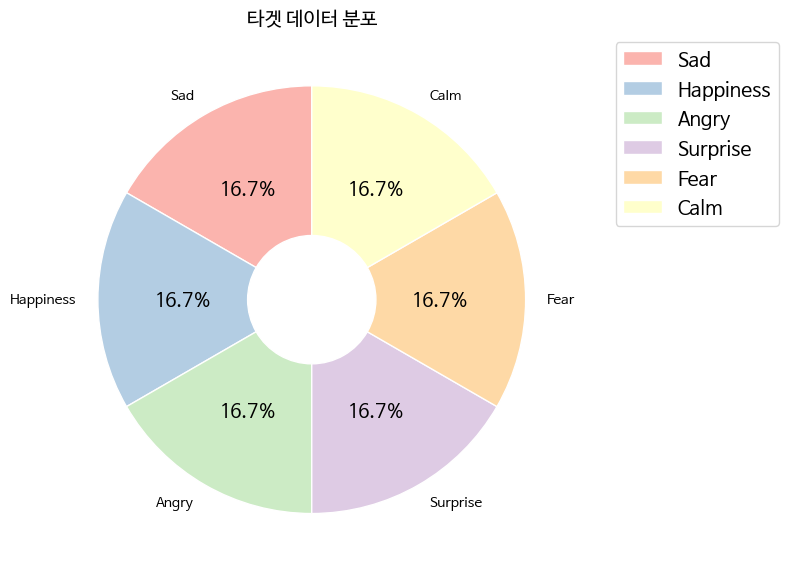

In [34]:
# 타겟 데이터 분포 확인

# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

counts = label_counts['count']
labels = label_counts['emotion']

# 그래프 크기 설정
plt.figure(figsize=(20, 6))

# 그래프 그리기
plt.pie(counts, labels=labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.title('타겟 데이터 분포')

# 범례를 그래프 오른쪽에 배치
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 모델 훈련

## 1. 레이블 인코딩

In [35]:
labeling_label_df = labeling_df.copy()
labeling_label_df

,folder_name,file_name,file_path,gender,emotion
0,F2001,F2001_000001.wav,/mnt/gcs-bucket/...,F,Sad
1,F2001,F2001_000002.wav,/mnt/gcs-bucket/...,F,Sad
2,F2001,F2001_000003.wav,/mnt/gcs-bucket/...,F,Sad
3,F2001,F2001_000004.wav,/mnt/gcs-bucket/...,F,Sad
4,F2001,F2001_000005.wav,/mnt/gcs-bucket/...,F,Sad
...,...,...,...,...,...
79995,M6003,M6003_000156.wav,/mnt/gcs-bucket/...,M,Calm
79996,M6003,M6003_000157.wav,/mnt/gcs-bucket/...,M,Calm
79997,M6003,M6003_000158.wav,/mnt/gcs-bucket/...,M,Calm
79998,M6003,M6003_000159.wav,/mnt/gcs-bucket/...,M,Calm


### ○ gender

In [36]:
# gender 컬럼에서 고유 감정 레이블 추출
unique_gender = labeling_label_df['gender'].unique()

In [37]:
unique_gender

array(['F', 'M'], dtype=object)

In [38]:
# 레이블과 숫자를 매핑하는 딕셔너리 생성
gen_label2id = {gender: idx for idx, gender in enumerate(unique_gender)}
gen_id2label = {idx: gender for idx, gender in enumerate(unique_gender)}

In [39]:
gen_id2label

{0: 'F', 1: 'M'}

In [40]:
# gender 컬럼을 숫자로 변환 (벡터로 매핑)
labeling_label_df['gender'] = labeling_label_df['gender'].map(gen_label2id)

### ○ emotion

In [41]:
# emotion 컬럼에서 고유 감정 레이블 추출
unique_emotions = labeling_label_df['emotion'].unique()

In [42]:
unique_emotions

array(['Sad', 'Happiness', 'Angry', 'Surprise', 'Fear', 'Calm'],
      dtype=object)

In [43]:
# 레이블과 숫자를 매핑하는 딕셔너리 생성
emo_label2id = {emotion: idx for idx, emotion in enumerate(unique_emotions)}
emo_id2label = {idx: emotion for idx, emotion in enumerate(unique_emotions)}

In [44]:
emo_id2label

{0: 'Sad', 1: 'Happiness', 2: 'Angry', 3: 'Surprise', 4: 'Fear', 5: 'Calm'}

In [45]:
# emotion 컬럼을 숫자로 변환 (벡터로 매핑)
labeling_label_df['emotion'] = labeling_label_df['emotion'].map(emo_label2id)

In [46]:
labeling_label_df

,folder_name,file_name,file_path,gender,emotion
0,F2001,F2001_000001.wav,/mnt/gcs-bucket/...,0,0
1,F2001,F2001_000002.wav,/mnt/gcs-bucket/...,0,0
2,F2001,F2001_000003.wav,/mnt/gcs-bucket/...,0,0
3,F2001,F2001_000004.wav,/mnt/gcs-bucket/...,0,0
4,F2001,F2001_000005.wav,/mnt/gcs-bucket/...,0,0
...,...,...,...,...,...
79995,M6003,M6003_000156.wav,/mnt/gcs-bucket/...,1,5
79996,M6003,M6003_000157.wav,/mnt/gcs-bucket/...,1,5
79997,M6003,M6003_000158.wav,/mnt/gcs-bucket/...,1,5
79998,M6003,M6003_000159.wav,/mnt/gcs-bucket/...,1,5


In [47]:
labeling_label_df = labeling_label_df[['file_path', 'gender', 'emotion']]
labeling_label_df

,file_path,gender,emotion
0,/mnt/gcs-bucket/...,0,0
1,/mnt/gcs-bucket/...,0,0
2,/mnt/gcs-bucket/...,0,0
3,/mnt/gcs-bucket/...,0,0
4,/mnt/gcs-bucket/...,0,0
...,...,...,...
79995,/mnt/gcs-bucket/...,1,5
79996,/mnt/gcs-bucket/...,1,5
79997,/mnt/gcs-bucket/...,1,5
79998,/mnt/gcs-bucket/...,1,5


## 2. 데이터 분리

In [48]:
train_df = pd.read_csv('./data/csv/train_df.csv', encoding='utf-8', index_col=0)
val_df = pd.read_csv('./data/csv/val_df.csv', encoding='utf-8', index_col=0)
test_df = pd.read_csv('./data/csv/test_df.csv', encoding='utf-8', index_col=0)

In [49]:
train_df

,file_path,gender,emotion
49636,/mnt/gcs-bucket/...,1,1
24108,/mnt/gcs-bucket/...,0,4
27702,/mnt/gcs-bucket/...,0,0
36984,/mnt/gcs-bucket/...,0,0
55404,/mnt/gcs-bucket/...,1,2
...,...,...,...
21193,/mnt/gcs-bucket/...,0,3
36126,/mnt/gcs-bucket/...,0,3
53100,/mnt/gcs-bucket/...,1,5
4269,/mnt/gcs-bucket/...,0,4


In [50]:
val_df

,file_path,gender,emotion
29587,/mnt/gcs-bucket/...,0,5
72413,/mnt/gcs-bucket/...,1,4
5009,/mnt/gcs-bucket/...,0,2
66710,/mnt/gcs-bucket/...,1,5
27456,/mnt/gcs-bucket/...,0,4
...,...,...,...
36955,/mnt/gcs-bucket/...,0,5
71524,/mnt/gcs-bucket/...,1,0
13833,/mnt/gcs-bucket/...,0,3
5164,/mnt/gcs-bucket/...,0,2


In [51]:
test_df

,file_path,gender,emotion
52716,/mnt/gcs-bucket/...,1,3
75048,/mnt/gcs-bucket/...,1,0
49424,/mnt/gcs-bucket/...,1,5
57388,/mnt/gcs-bucket/...,1,4
16787,/mnt/gcs-bucket/...,0,5
...,...,...,...
60092,/mnt/gcs-bucket/...,1,4
40785,/mnt/gcs-bucket/...,1,5
5315,/mnt/gcs-bucket/...,0,1
77723,/mnt/gcs-bucket/...,1,3


### ○ 타겟 비중 확인

In [52]:
# 타겟 데이터 비중 확인
train_target = train_df.emotion.value_counts().reset_index()
validation_target = val_df.emotion.value_counts().reset_index()
test_target = test_df.emotion.value_counts().reset_index()

In [53]:
display(train_target)
display(validation_target)
display(test_target)

,emotion,count
0,1,6400
1,4,6400
2,0,6400
3,2,6400
4,3,6400
5,5,6400


,emotion,count
0,5,1600
1,4,1600
2,2,1600
3,0,1600
4,1,1600
5,3,1600


,emotion,count
0,3,2000
1,0,2000
2,5,2000
3,4,2000
4,1,2000
5,2,2000


## 3. 전처리 함수 정의

In [54]:
import numpy as np
import pandas as pd
import torch
import librosa
import librosa.display
from transformers import Wav2Vec2FeatureExtractor
from torch.nn.utils.rnn import pad_sequence
import soundfile as sf

In [55]:
# 분산 처리에서 사용
def preprocess(df, name, max_length=103420):
    # 데이터 세트를 10개로 분할
    data_splits = np.array_split(df, 13)

    for i, split_df in enumerate(data_splits):
        # 각 분할을 Dataset 형식으로 변환
        split_dataset = Dataset.from_pandas(split_df)
        
        # 오디오 로드
        split_dataset = split_dataset.map(load_audio, batched=True, batch_size=10)
        # 오디오 전처리 수행, 패딩 길이를 일관되게 적용
        split_dataset = split_dataset.map(lambda batch: preprocess_data(batch, max_length), batched=True, batch_size=10)

        # 처리된 데이터셋을 디스크에 저장
        split_dataset.save_to_disk(f"./data/datasets/{name}/processed_split_{i}.dataset")

        # 메모리 해제
        del split_df, split_dataset
        gc.collect()

In [56]:
def load_audio(batch):
    # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
    loaded_audio  = [librosa.load(file_path, sr=16000) for file_path in batch["file_path"]]
            
    # 튜플 리스트에서 speech_array만 추출하여 batch에 추가
    batch["speech_array"] = [audio[0] for audio in loaded_audio]

    gc.collect()
    
    return batch

In [57]:
def preprocess_data(batch, max_length):
    input_values = []
    labels = []

    # Wav2Vec2 전처리 수행 (배치 단위로 처리)
    inputs = feature_extractor(batch['speech_array'], sampling_rate=16000, return_tensors="pt",
                               padding="max_length", max_length=max_length, truncation=True)

    # 전처리된 오디오 데이터
    input_values = inputs.input_values.to(torch.float16)
    
    # attention_mask는 패딩된 부분을 무시하도록 모델에 알려주는 마스크
    attention_mask = inputs.attention_mask

    # 레이블 가
    labels = torch.tensor(batch["emotion"], dtype=torch.int64)
    
    # 메모리 절약을 위해 speech_array 제거
    del batch["speech_array"]
    
    return {
        "input_values": input_values,
        "attention_mask": attention_mask,
        "labels": labels,
    }

## 4. 데이터셋 전처리 및 생성

In [58]:
from datasets import Dataset

In [59]:
# preprocess(train_df, 'train')

In [60]:
# preprocess(val_df, 'val')

In [61]:
# preprocess(test_df, 'test')

### ○ 데이터셋 불러오기

In [62]:
from datasets import load_from_disk
import gc

def load_disk(name):
    # 빈 리스트에 모든 분할 데이터를 저장
    all_processed_splits = []
    
    # 각 조각을 디스크에서 불러와 리스트에 추가
    for i in range(13):
        split_dataset = load_from_disk(f"./data/datasets/{name}/processed_split_{i}.dataset")
        all_processed_splits.append(split_dataset)

        # 메모리 해제
        gc.collect()
    
    return all_processed_splits

In [63]:
train_processed_splits = load_disk('train')

In [64]:
val_processed_splits = load_disk('val')

In [65]:
test_processed_splits = load_disk('test')

### ○ 데이터셋 병합

In [66]:
from datasets import concatenate_datasets

# 병합
train_dataset = concatenate_datasets(train_processed_splits)
val_dataset = concatenate_datasets(val_processed_splits)
test_dataset = concatenate_datasets(test_processed_splits)

In [67]:
# 'file_path', 'gender', '__index_level_0__' 필드를 제외한 새로운 데이터셋 생성
train_dataset_filtered = train_dataset.remove_columns(["file_path", "gender", "__index_level_0__", "emotion"])
val_dataset_filtered = val_dataset.remove_columns(["file_path", "gender", "__index_level_0__", "emotion"])
test_dataset_filtered = test_dataset.remove_columns(["file_path", "gender", "__index_level_0__", "emotion"])

## 5. 평가지표 정의

In [68]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    
    # 혼동 행렬 계산
    cm = confusion_matrix(labels, preds)
    
    # 주요 지표 추출
    report = classification_report(labels, preds, output_dict=True)
    
    # F1, 정확도 등 주요 지표를 반환
    return {
        'accuracy': report['accuracy'],
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
        'f1': report['macro avg']['f1-score'],
        # 혼동 행렬을 텍스트로 기록할 수 있음 (스칼라로 변환 불가능)
        'confusion_matrix_text': str(cm)
    }


In [69]:
# from evaluate import load
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# def compute_metrics(pred):
#     pred_ids = pred.predictions.argmax(-1)
#     label_ids = pred.label_ids
    
#     # 정확도, 정밀도, 재현율, F1 점수
#     accuracy = accuracy_score(label_ids, pred_ids)
#     precision = precision_score(label_ids, pred_ids, average='weighted')
#     recall = recall_score(label_ids, pred_ids, average='weighted')
#     f1 = f1_score(label_ids, pred_ids, average='weighted')
    
#     # 혼동 행렬
#     cm = confusion_matrix(label_ids, pred_ids)
    
#     # ROC 커브 및 AUC 계산
#     fpr, tpr, _ = roc_curve(label_ids.ravel(), pred_ids.ravel(), pos_label=1)
#     roc_auc = auc(fpr, tpr)
    
#     # ROC 커브 시각화
#     plt.figure()
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title("ROC Curve")
#     plt.legend(loc="lower right")
#     plt.show()
    
#     # 결과 반환
#     return {
#         "accuracy": accuracy,
#         "precision": precision,
#         "recall": recall,
#         "f1": f1,
#         "confusion_matrix": cm,
#         "roc_auc": roc_auc
#     }

## 1. 모델과 프로세서 불러오기
https://huggingface.co/docs/transformers/model_doc/wav2vec2

In [70]:
import torch
from transformers import Wav2Vec2ForSequenceClassification, Wav2Vec2Processor

# GPU가 사용 가능한지 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Wav2Vec2 모델 로드
model = Wav2Vec2ForSequenceClassification.from_pretrained(
    "facebook/wav2vec2-large-xlsr-53",
    num_labels=6,  # 감정 분류 레이블 수
    torch_dtype=torch.float16  # 16-bit precision 사용
).to(device)

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-large-xlsr-53 and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [71]:
# Feature Extractor 로드 (입력 전처리를 위해 필요)
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-large-xlsr-53")

## 6. 학습 파라미터 정의

In [75]:
from transformers import TrainingArguments

# 학습 파라미터 설정
training_args = TrainingArguments(
    output_dir="./model/1Cycle/wav2vec2-finetuned",  # 결과를 저장할 경로
    evaluation_strategy="epoch",  # 매 에폭마다 평가
    learning_rate=8e-5,  # 학습률
    per_device_train_batch_size=10,  # GPU/CPU당 배치 크기
    per_device_eval_batch_size=10,  # 평가 시 배치 크기
    num_train_epochs=3,  # 학습할 에폭 수
    weight_decay=0.01,  # 가중치 감소
    logging_dir="./logs",  # 로그 저장 경로
    logging_steps=10,  # 로그를 기록할 간격
    fp16=True  # 16-bit precision 사용
)

## 7. Trainer 초기화

In [76]:
from transformers import Trainer

# 트레이너 초기화
trainer = Trainer(
    model=model,  # 학습할 모델
    args=training_args,  # 학습 파라미터
    train_dataset=train_dataset_filtered,  # 훈련 데이터
    eval_dataset=val_dataset_filtered,  # 검증 데이터
    compute_metrics=compute_metrics  # 평가지표 함수
)

## 8. 학습

In [ ]:
# 학습 시작
train_output = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Confusion Matrix Text
1,0.000000,nan,0.166667,0.027778,0.166667,0.047619,[[1600 0 0 0 0 0] [1600 0 0 0 0 0] [1600 0 0 0 0 0] [1600 0 0 0 0 0] [1600 0 0 0 0 0] [1600 0 0 0 0 0]]


Trainer is attempting to log a value of "[[1600    0    0    0    0    0]
 [1600    0    0    0    0    0]
 [1600    0    0    0    0    0]
 [1600    0    0    0    0    0]
 [1600    0    0    0    0    0]
 [1600    0    0    0    0    0]]" of type <class 'str'> for key "eval/confusion_matrix_text" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


In [ ]:
# 모델 저장
torch.save(model.state_dict(), "./model/model.pth")

In [ ]:
# 학습 상태 저장
trainer.save_state()

In [ ]:
torch-model-archiver --model-name model \
                     --version 1.0 \
                     --serialized-file ./model/pytorch_model.bin \
                     --handler "serve.handler" \
                     --export-path ./model_store \
                     --extra-files "serve/handler.py"